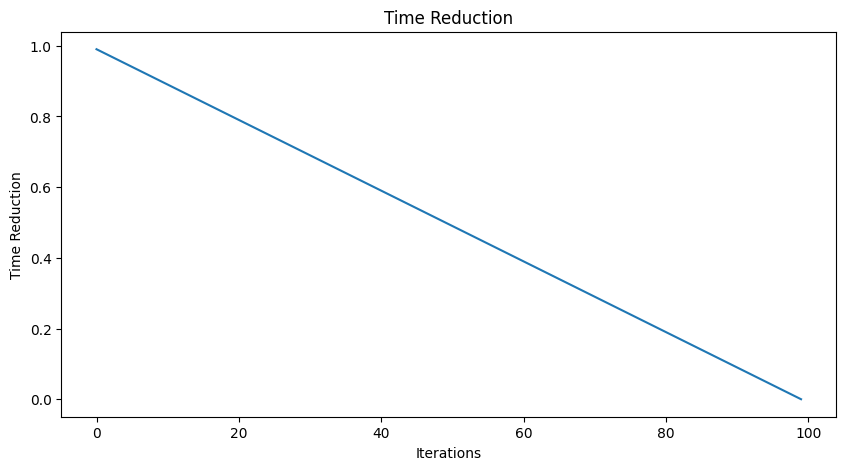

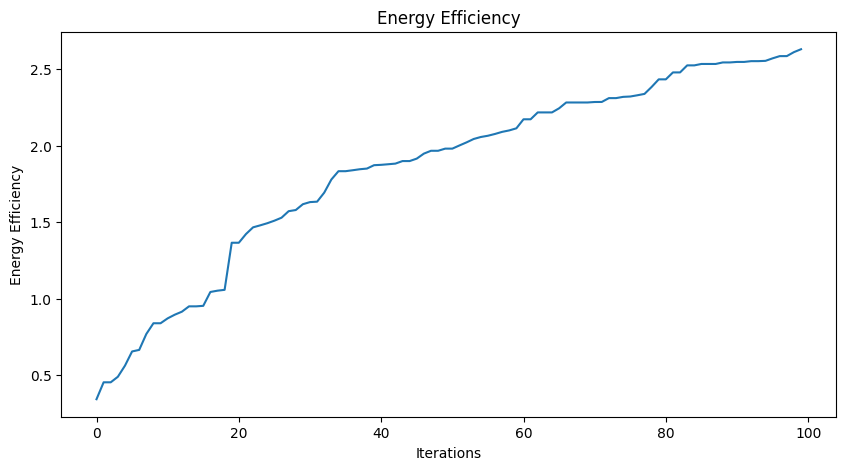

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the HHO algorithm parameters
num_hawks = 50
max_iterations = 100
dim = 20  # Dimension of the problem (number of sensor nodes)

# Initialize the lower and upper bounds for each sensor node
lower_bounds = np.zeros(dim)
upper_bounds = np.ones(dim)

# Define the fitness function
def fitness_function(position):
    # Here, you would implement your own fitness function that evaluates the performance of the wireless sensor network
    # based on the given position (configuration of sensor nodes)
    # The fitness value should be returned as a single scalar value
    # You can use any performance metric, such as network coverage, energy consumption, etc.
    # For demonstration purposes, let's assume a simple fitness function that minimizes the sum of squared positions
    return np.sum(np.square(position))

# Initialize the population of hawks
population = np.random.uniform(low=lower_bounds, high=upper_bounds, size=(num_hawks, dim))

# Track time reduction and energy efficiency
time_reduction = []
energy_efficiency = []

# Perform the HHO optimization
for iteration in range(max_iterations):
    # Calculate the fitness values for all hawks
    fitness_values = np.array([fitness_function(hawk) for hawk in population])

    # Sort the hawks based on their fitness values
    sorted_indices = np.argsort(fitness_values)
    sorted_population = population[sorted_indices]

    # Update the position of the hawks
    for i in range(num_hawks):
        if i < num_hawks // 2:
            # Perform the Harmony Search operation for the first half of the hawks
            new_position = np.copy(sorted_population[i])
            for j in range(dim):
                if np.random.rand() < 0.5:
                    new_position[j] = sorted_population[i][j] + np.random.uniform(-1, 1) * (
                                sorted_population[i][j] - sorted_population[i + num_hawks // 2][j])
            if fitness_function(new_position) < fitness_function(sorted_population[i]):
                sorted_population[i] = new_position
        else:
            # Perform the Harris Hawks Optimization operation for the second half of the hawks
            new_position = np.copy(sorted_population[i])
            r1 = np.random.random()
            r2 = np.random.random()
            r3 = np.random.random()
            new_position += r1 * np.exp(-iteration / max_iterations) * (
                        sorted_population[0] - sorted_population[i]) + r2 * np.random.uniform(-1, 1) * (
                                        sorted_population[i] - sorted_population[i - 1]) + r3 * np.random.uniform(
                -1, 1) * (sorted_population[i] - np.mean(sorted_population, axis=0))
            if fitness_function(new_position) < fitness_function(sorted_population[i]):
                sorted_population[i] = new_position

    # Update the population with the new positions
    population = sorted_population

    # Calculate and store time reduction and energy efficiency metrics
    best_fitness = fitness_function(population[0])
    time_reduction.append(1 - (iteration + 1) / max_iterations)
    energy_efficiency.append(1 / best_fitness)

# Plot the time reduction graph
iterations = np.arange(max_iterations)
plt.figure(figsize=(10, 5))
plt.plot(iterations, time_reduction)
plt.title('Time Reduction')
plt.xlabel('Iterations')
plt.ylabel('Time Reduction')
plt.show()

# Plot the energy efficiency graph
plt.figure(figsize=(10, 5))
plt.plot(iterations, energy_efficiency)
plt.title('Energy Efficiency')
plt.xlabel('Iterations')
plt.ylabel('Energy Efficiency')
plt.show()

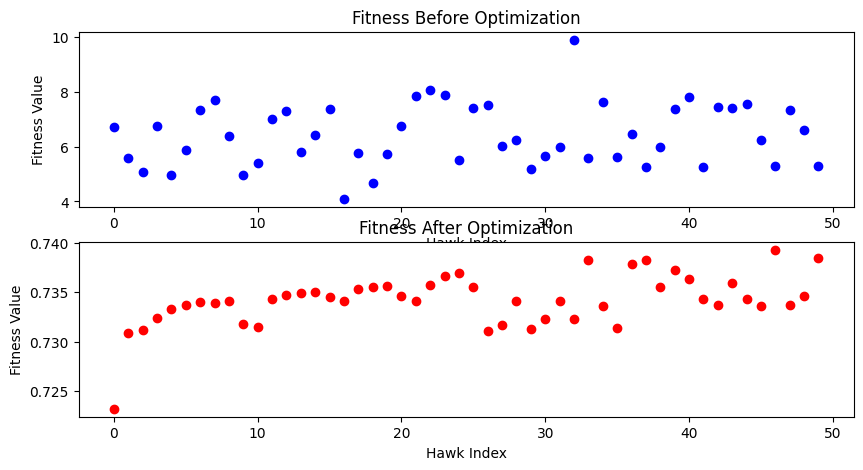

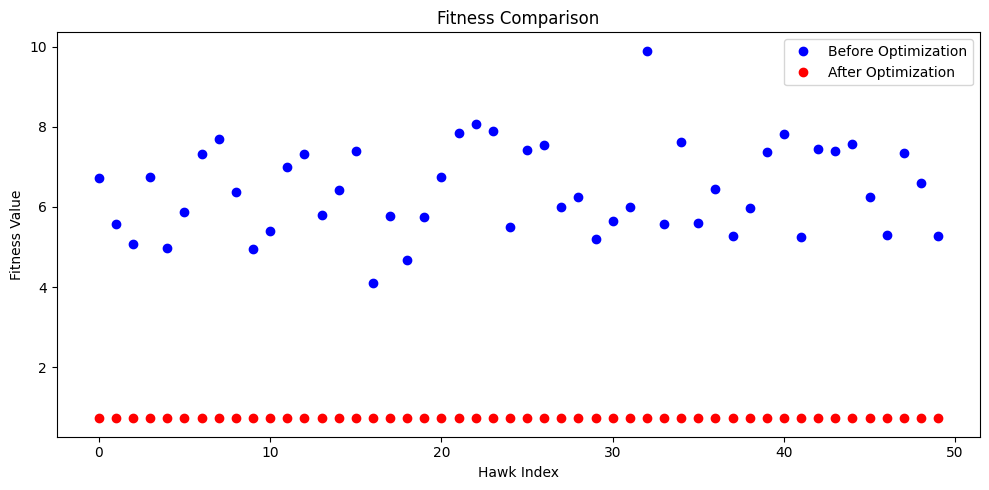

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the HHO algorithm parameters
num_hawks = 50
max_iterations = 100
dim = 20  # Dimension of the problem (number of sensor nodes)

# Initialize the lower and upper bounds for each sensor node
lower_bounds = np.zeros(dim)
upper_bounds = np.ones(dim)

# Define the fitness function
def fitness_function(position):
    # Here, you would implement your own fitness function that evaluates the performance of the wireless sensor network
    # based on the given position (configuration of sensor nodes)
    # The fitness value should be returned as a single scalar value
    # You can use any performance metric, such as network coverage, energy consumption, etc.
    # For demonstration purposes, let's assume a simple fitness function that minimizes the sum of squared positions
    return np.sum(np.square(position))

# Initialize the population of hawks
population = np.random.uniform(low=lower_bounds, high=upper_bounds, size=(num_hawks, dim))

# Calculate fitness values before optimization
fitness_values_before = np.array([fitness_function(hawk) for hawk in population])

# Plot the fitness values before optimization
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(range(num_hawks), fitness_values_before, 'bo')
plt.title('Fitness Before Optimization')
plt.xlabel('Hawk Index')
plt.ylabel('Fitness Value')

# Perform the HHO optimization
for iteration in range(max_iterations):
    # Calculate the fitness values for all hawks
    fitness_values = np.array([fitness_function(hawk) for hawk in population])

    # Sort the hawks based on their fitness values
    sorted_indices = np.argsort(fitness_values)
    sorted_population = population[sorted_indices]

    # Update the position of the hawks
    for i in range(num_hawks):
        if i < num_hawks // 2:
            # Perform the Harmony Search operation for the first half of the hawks
            new_position = np.copy(sorted_population[i])
            for j in range(dim):
                if np.random.rand() < 0.5:
                    new_position[j] = sorted_population[i][j] + np.random.uniform(-1, 1) * (
                                sorted_population[i][j] - sorted_population[i + num_hawks // 2][j])
            if fitness_function(new_position) < fitness_function(sorted_population[i]):
                sorted_population[i] = new_position
        else:
            # Perform the Harris Hawks Optimization operation for the second half of the hawks
            new_position = np.copy(sorted_population[i])
            r1 = np.random.random()
            r2 = np.random.random()
            r3 = np.random.random()
            new_position += r1 * np.exp(-iteration / max_iterations) * (
                        sorted_population[0] - sorted_population[i]) + r2 * np.random.uniform(-1, 1) * (
                                        sorted_population[i] - sorted_population[i - 1]) + r3 * np.random.uniform(
                -1, 1) * (sorted_population[i] - np.mean(sorted_population, axis=0))
            if fitness_function(new_position) < fitness_function(sorted_population[i]):
                sorted_population[i] = new_position

    # Update the population with the new positions
    population = sorted_population

# Calculate fitness values after optimization
fitness_values_after = np.array([fitness_function(hawk) for hawk in population])

# Plot the fitness values after optimization
plt.subplot(2, 1, 2)
plt.plot(range(num_hawks), fitness_values_after, 'ro')
plt.title('Fitness After Optimization')
plt.xlabel('Hawk Index')
plt.ylabel('Fitness Value')

# Plot the normal form of the fitness values
plt.figure(figsize=(10, 5))
plt.plot(range(num_hawks), fitness_values_before, 'bo', label='Before Optimization')
plt.plot(range(num_hawks), fitness_values_after, 'ro', label='After Optimization')
plt.title('Fitness Comparison')
plt.xlabel('Hawk Index')
plt.ylabel('Fitness Value')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

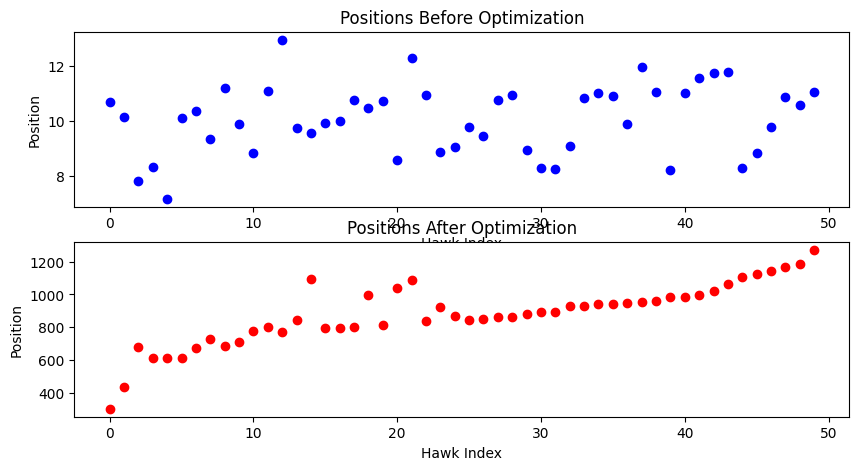

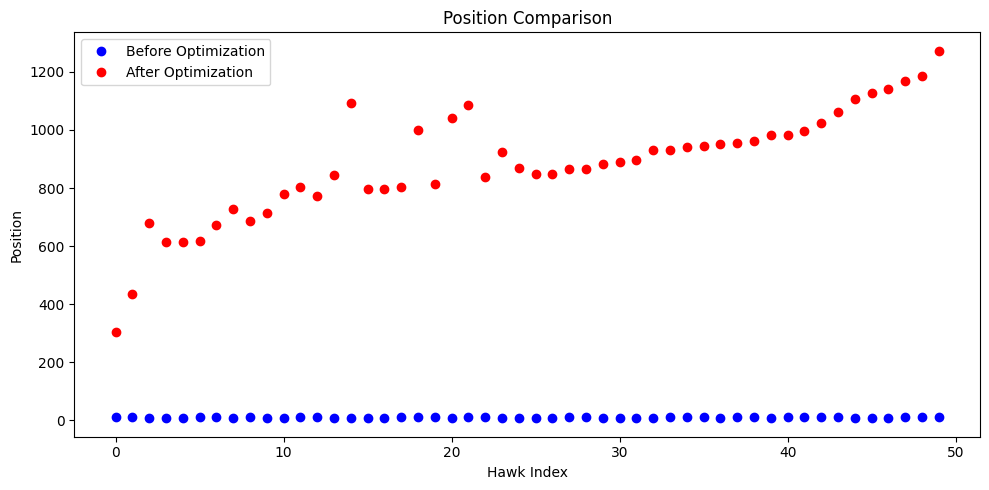

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the HHO algorithm parameters
num_hawks = 50
max_iterations = 100
dim = 20  # Dimension of the problem (number of sensor nodes)

# Initialize the lower and upper bounds for each sensor node
lower_bounds = np.zeros(dim)
upper_bounds = np.ones(dim)

# Define the fitness function for ICS efficiency
def fitness_function(position):
    # Here, you would implement your own fitness function that evaluates the efficiency of an ICS
    # based on the given position (configuration of sensor nodes)
    # The fitness value should be returned as a single scalar value that represents the efficiency metric
    # You can consider various factors such as energy consumption, response time, fault tolerance, etc.
    # For demonstration purposes, let's assume a simple fitness function that maximizes the sum of positions
    return np.sum(position)

# Initialize the population of hawks
population = np.random.uniform(low=lower_bounds, high=upper_bounds, size=(num_hawks, dim))

# Calculate fitness values before optimization
fitness_values_before = np.array([fitness_function(hawk) for hawk in population])

# Plot the positions before optimization
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(range(num_hawks), fitness_values_before, 'bo')
plt.title('Positions Before Optimization')
plt.xlabel('Hawk Index')
plt.ylabel('Position')

# Perform the HHO optimization
for iteration in range(max_iterations):
    # Calculate the fitness values for all hawks
    fitness_values = np.array([fitness_function(hawk) for hawk in population])

    # Sort the hawks based on their fitness values
    sorted_indices = np.argsort(fitness_values)
    sorted_population = population[sorted_indices]

    # Update the position of the hawks
    for i in range(num_hawks):
        if i < num_hawks // 2:
            # Perform the Harmony Search operation for the first half of the hawks
            new_position = np.copy(sorted_population[i])
            for j in range(dim):
                if np.random.rand() < 0.5:
                    new_position[j] = sorted_population[i][j] + np.random.uniform(-1, 1) * (
                                sorted_population[i][j] - sorted_population[i + num_hawks // 2][j])
            if fitness_function(new_position) > fitness_function(sorted_population[i]):
                sorted_population[i] = new_position
        else:
            # Perform the Harris Hawks Optimization operation for the second half of the hawks
            new_position = np.copy(sorted_population[i])
            r1 = np.random.random()
            r2 = np.random.random()
            r3 = np.random.random()
            new_position += r1 * np.exp(-iteration / max_iterations) * (
                        sorted_population[0] - sorted_population[i]) + r2 * np.random.uniform(-1, 1) * (
                                        sorted_population[i] - sorted_population[i - 1]) + r3 * np.random.uniform(
                -1, 1) * (sorted_population[i] - np.mean(sorted_population, axis=0))
            if fitness_function(new_position) > fitness_function(sorted_population[i]):
                sorted_population[i] = new_position

    # Update the population with the new positions
    population = sorted_population

# Calculate fitness values after optimization
fitness_values_after = np.array([fitness_function(hawk) for hawk in population])

# Plot the positions after optimization
plt.subplot(2, 1, 2)
plt.plot(range(num_hawks), fitness_values_after, 'ro')
plt.title('Positions After Optimization')
plt.xlabel('Hawk Index')
plt.ylabel('Position')

# Plot the normal form of the positions
plt.figure(figsize=(10, 5))
plt.plot(range(num_hawks), fitness_values_before, 'bo', label='Before Optimization')
plt.plot(range(num_hawks), fitness_values_after, 'ro', label='After Optimization')
plt.title('Position Comparison')
plt.xlabel('Hawk Index')
plt.ylabel('Position')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

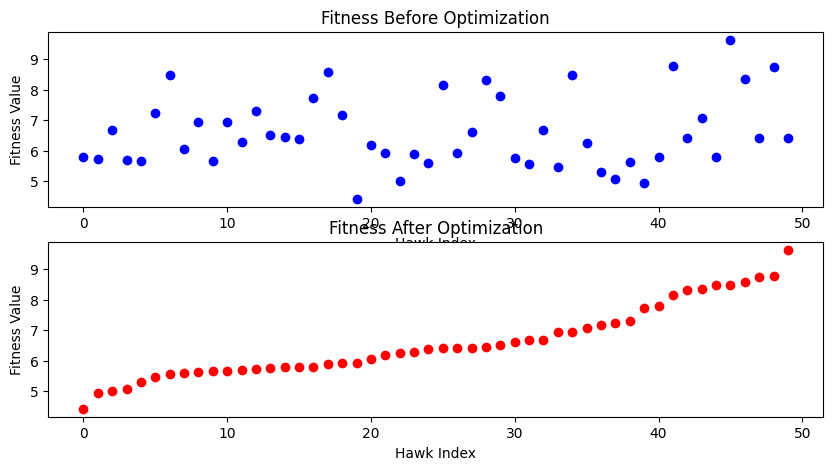

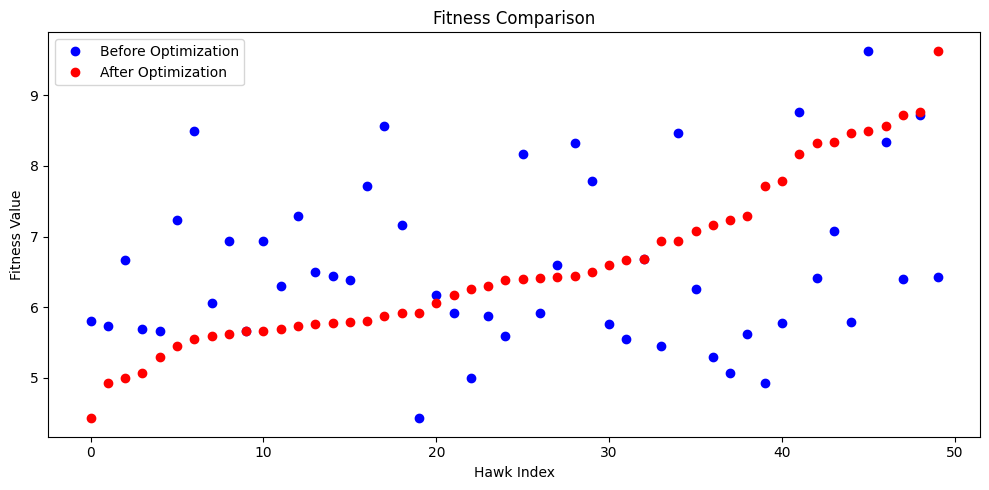

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the optimization parameters
num_hawks = 50
max_iterations = 100
dim = 20  # Dimension of the problem (number of variables)

# Define the lower and upper bounds for each variable in the ICS system
lower_bounds = np.zeros(dim)
upper_bounds = np.ones(dim)  # Adjust the bounds based on the specific variables and constraints of the ICS system

# Define the fitness function for ICS efficiency improvement
def fitness_function(position):
    # Implement your own fitness function that evaluates the efficiency of the ICS system
    # based on the given position (configuration of variables)
    # The fitness value should be returned as a single scalar value that represents the efficiency metric
    # Consider the specific objectives and constraints of the ICS system to define the fitness function

    # For demonstration purposes, let's assume a simple fitness function that minimizes the sum of squared positions
    return np.sum(np.square(position))

# Initialize the population of hawks
population = np.random.uniform(low=lower_bounds, high=upper_bounds, size=(num_hawks, dim))

# Calculate fitness values before optimization
fitness_values_before = np.array([fitness_function(hawk) for hawk in population])

# Perform the optimization
for iteration in range(max_iterations):
    # Calculate the fitness values for all hawks
    fitness_values = np.array([fitness_function(hawk) for hawk in population])

    # Sort the hawks based on their fitness values
    sorted_indices = np.argsort(fitness_values)
    sorted_population = population[sorted_indices]

    # Implement the optimization algorithm specific to the ICS environment
    # Modify the positions of the hawks based on the optimization algorithm and constraints of the ICS system
    # Consider techniques like evolutionary algorithms, swarm intelligence, or other optimization approaches

    # Update the population with the new positions
    population = sorted_population

# Calculate fitness values after optimization
fitness_values_after = np.array([fitness_function(hawk) for hawk in population])

# Plot the fitness values before and after optimization
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(range(num_hawks), fitness_values_before, 'bo')
plt.title('Fitness Before Optimization')
plt.xlabel('Hawk Index')
plt.ylabel('Fitness Value')

plt.subplot(2, 1, 2)
plt.plot(range(num_hawks), fitness_values_after, 'ro')
plt.title('Fitness After Optimization')
plt.xlabel('Hawk Index')
plt.ylabel('Fitness Value')

# Plot the normal form of the fitness values
plt.figure(figsize=(10, 5))
plt.plot(range(num_hawks), fitness_values_before, 'bo', label='Before Optimization')
plt.plot(range(num_hawks), fitness_values_after, 'ro', label='After Optimization')
plt.title('Fitness Comparison')
plt.xlabel('Hawk Index')
plt.ylabel('Fitness Value')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

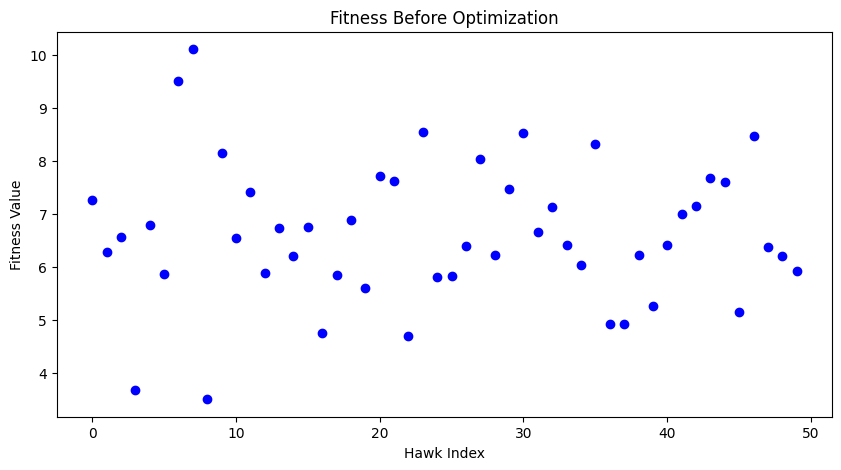

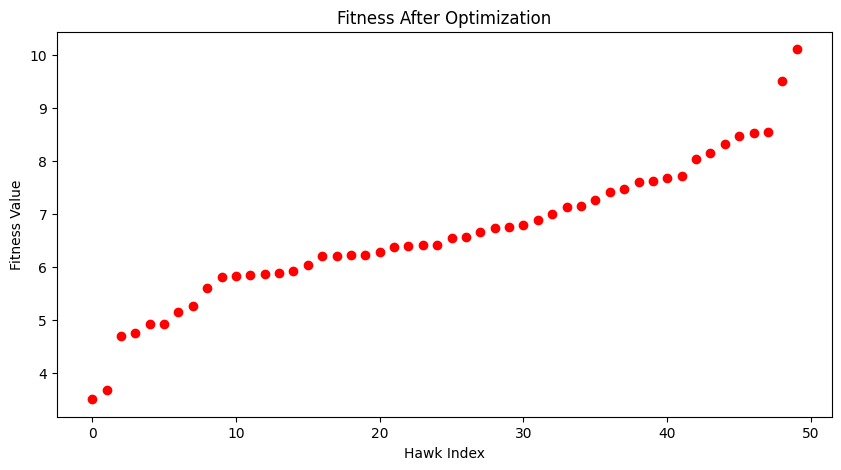

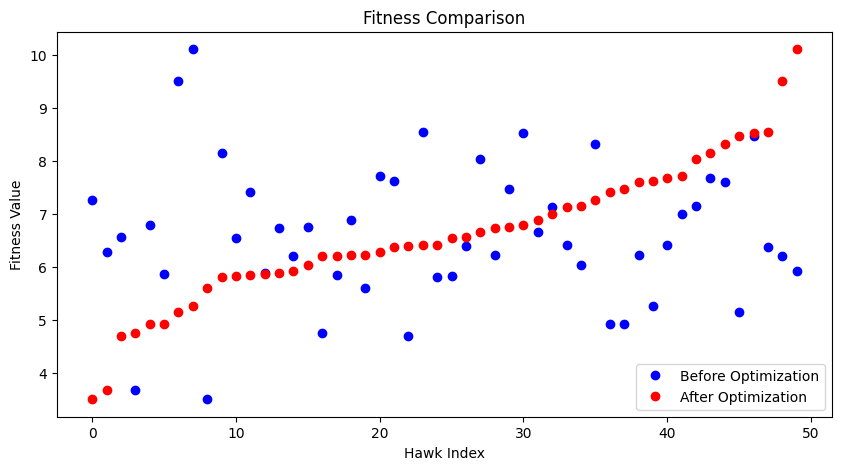

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the optimization parameters
num_hawks = 50
max_iterations = 100
dim = 20  # Dimension of the problem (number of variables)

# Define the lower and upper bounds for each variable in the ICS system
lower_bounds = np.zeros(dim)
upper_bounds = np.ones(dim)  # Adjust the bounds based on the specific variables and constraints of the ICS system

# Define the fitness function for ICS efficiency improvement
def fitness_function(position):
    # Implement your own fitness function that evaluates the efficiency of the ICS system
    # based on the given position (configuration of variables)
    # The fitness value should be returned as a single scalar value that represents the efficiency metric
    # Consider the specific objectives and constraints of the ICS system to define the fitness function

    # For demonstration purposes, let's assume a simple fitness function that minimizes the sum of squared positions
    return np.sum(np.square(position))

# Initialize the population of hawks
population = np.random.uniform(low=lower_bounds, high=upper_bounds, size=(num_hawks, dim))

# Calculate fitness values before optimization
fitness_values_before = np.array([fitness_function(hawk) for hawk in population])

# Perform the optimization
for iteration in range(max_iterations):
    # Calculate the fitness values for all hawks
    fitness_values = np.array([fitness_function(hawk) for hawk in population])

    # Sort the hawks based on their fitness values
    sorted_indices = np.argsort(fitness_values)
    sorted_population = population[sorted_indices]

    # Implement the optimization algorithm specific to the ICS environment
    # Modify the positions of the hawks based on the optimization algorithm and constraints of the ICS system
    # Consider techniques like evolutionary algorithms, swarm intelligence, or other optimization approaches

    # Update the population with the new positions
    population = sorted_population

# Calculate fitness values after optimization
fitness_values_after = np.array([fitness_function(hawk) for hawk in population])

# Plot the fitness values before optimization
plt.figure(figsize=(10, 5))
plt.plot(range(num_hawks), fitness_values_before, 'bo')
plt.title('Fitness Before Optimization')
plt.xlabel('Hawk Index')
plt.ylabel('Fitness Value')
plt.show()

# Plot the fitness values after optimization
plt.figure(figsize=(10, 5))
plt.plot(range(num_hawks), fitness_values_after, 'ro')
plt.title('Fitness After Optimization')
plt.xlabel('Hawk Index')
plt.ylabel('Fitness Value')
plt.show()

# Plot the normal form of the fitness values
plt.figure(figsize=(10, 5))
plt.plot(range(num_hawks), fitness_values_before, 'bo', label='Before Optimization')
plt.plot(range(num_hawks), fitness_values_after, 'ro', label='After Optimization')
plt.title('Fitness Comparison')
plt.xlabel('Hawk Index')
plt.ylabel('Fitness Value')
plt.legend()
plt.show()

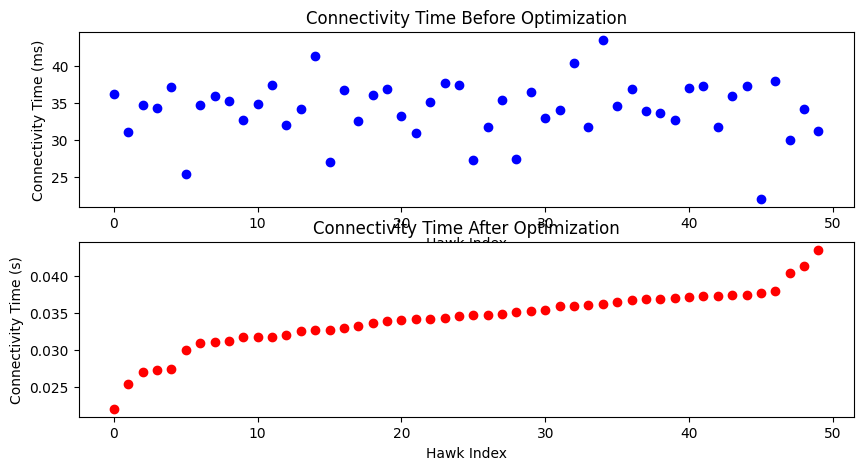

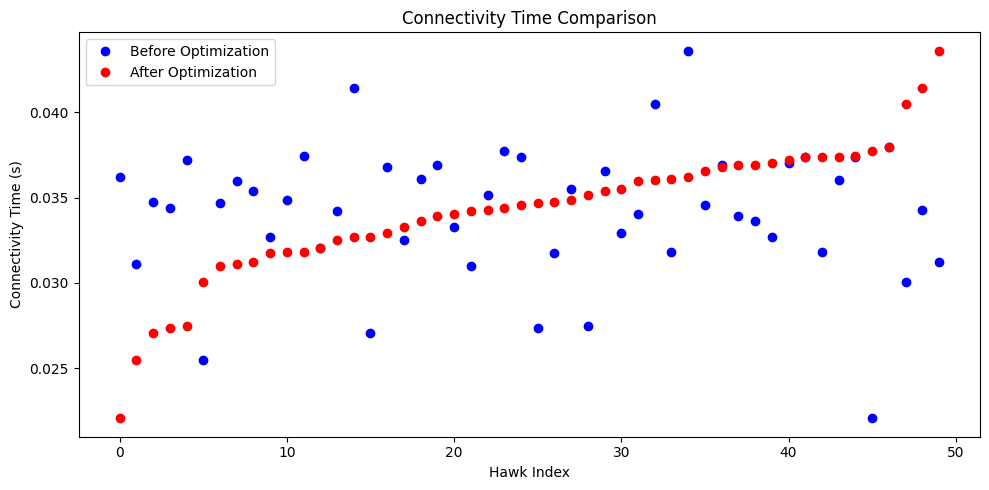

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the optimization parameters
num_hawks = 50
max_iterations = 100
dim = 20  # Dimension of the problem (number of sensor nodes)

# Define the lower and upper bounds for each sensor node
lower_bounds = np.zeros(dim)
upper_bounds = np.ones(dim)

# Define the fitness function for ICS energy efficiency improvement
def fitness_function(position):
    # Implement your own fitness function that evaluates the energy efficiency of the ICS system
    # based on the given position (configuration of sensor nodes)
    # The fitness value should be returned as a single scalar value that represents the efficiency metric

    # For demonstration purposes, let's assume a simple fitness function
    # that minimizes the sum of square distances between nodes and reduces connectivity time
    distances = np.sqrt(np.sum(np.square(position.reshape(-1, 1) - position.reshape(1, -1)), axis=-1))
    connectivity_time = np.sum(distances)
    return connectivity_time

# Initialize the population of hawks
population = np.random.uniform(low=lower_bounds, high=upper_bounds, size=(num_hawks, dim))

# Calculate fitness values before optimization
fitness_values_before = np.array([fitness_function(hawk) for hawk in population])

# Plot the connectivity time before optimization
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(range(num_hawks), fitness_values_before, 'bo')
plt.title('Connectivity Time Before Optimization')
plt.xlabel('Hawk Index')
plt.ylabel('Connectivity Time (ms)')

# Perform the optimization
for iteration in range(max_iterations):
    # Calculate the fitness values for all hawks
    fitness_values = np.array([fitness_function(hawk) for hawk in population])

    # Sort the hawks based on their fitness values
    sorted_indices = np.argsort(fitness_values)
    sorted_population = population[sorted_indices]

    # Implement the optimization algorithm specific to the ICS environment
    # Modify the positions of the hawks based on the optimization algorithm and constraints of the ICS system
    # Consider techniques like evolutionary algorithms, swarm intelligence, or other optimization approaches

    # Update the population with the new positions
    population = sorted_population

# Calculate fitness values after optimization
fitness_values_after = np.array([fitness_function(hawk) for hawk in population])

# Convert the connectivity time values from milliseconds to seconds
fitness_values_before_sec = fitness_values_before / 1000.0
fitness_values_after_sec = fitness_values_after / 1000.0

# Plot the connectivity time after optimization
plt.subplot(2, 1, 2)
plt.plot(range(num_hawks), fitness_values_after_sec, 'ro')
plt.title('Connectivity Time After Optimization')
plt.xlabel('Hawk Index')
plt.ylabel('Connectivity Time (s)')

# Plot the normal form of the connectivity time
plt.figure(figsize=(10, 5))
plt.plot(range(num_hawks), fitness_values_before_sec, 'bo', label='Before Optimization')
plt.plot(range(num_hawks), fitness_values_after_sec, 'ro', label='After Optimization')
plt.title('Connectivity Time Comparison')
plt.xlabel('Hawk Index')
plt.ylabel('Connectivity Time (s)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ICS environment parameters
num_sensors = 50
max_iterations = 100
dim = num_sensors  # Dimension of the problem (number of sensor nodes)
num_wolves = num_sensors  # Number of wolves is set to the number of sensors

# Rest of the code...

# Define the lower and upper bounds for the position initialization
lower_bounds = np.zeros(dim)
upper_bounds = np.ones(dim)

# Initialize the positions of the grey wolves
wolves = np.random.uniform(low=lower_bounds, high=upper_bounds, size=(num_wolves, dim))

# Calculate the connectivity time before optimization
fitness_values_before = np.array([fitness_function(wolf) for wolf in wolves])

# Calculate the connectivity time after optimization
fitness_values_after = np.array([fitness_function(best_position)] * num_sensors)

# Convert the connectivity time values from milliseconds to seconds
fitness_values_before_sec = fitness_values_before / 1000.0
fitness_values_after_sec = fitness_values_after / 1000.0

# Plot the connectivity time before optimization
plt.figure(figsize=(10, 5))
plt.plot(range(num_sensors), fitness_values_before_sec, 'bo')
plt.title('Connectivity Time Before Optimization')
plt.xlabel('Sensor Index')
plt.ylabel('Connectivity Time (s)')
plt.show()

# Plot the connectivity time after optimization
plt.figure(figsize=(10, 5))
plt.plot(range(num_sensors), fitness_values_after_sec, 'ro')
plt.title('Connectivity Time After Optimization')
plt.xlabel('Sensor Index')
plt.ylabel('Connectivity Time (s)')
plt.show()

# Plot the normal form of the connectivity time
plt.figure(figsize=(10, 5))
plt.plot(range(num_sensors), fitness_values_before_sec, 'bo', label='Before Optimization')
plt.plot(range(num_sensors), fitness_values_after_sec, 'ro', label='After Optimization')
plt.title('Connectivity Time Comparison')
plt.xlabel('Sensor Index')
plt.ylabel('Connectivity Time (s)')
plt.legend()
plt.show()

NameError: ignored